<a href="https://colab.research.google.com/github/thaiqtran/EE-399-HW-2/blob/main/399_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part a) 
Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation)
between the first 100 images in the matrix X. Thus each element is given by cjk = x
T
j xk where xj is
the jth column of the matrix. Plot the correlation matrix using pcolor.


In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load the data
data = scipy.io.loadmat('yalefaces.mat')
X = data['X']




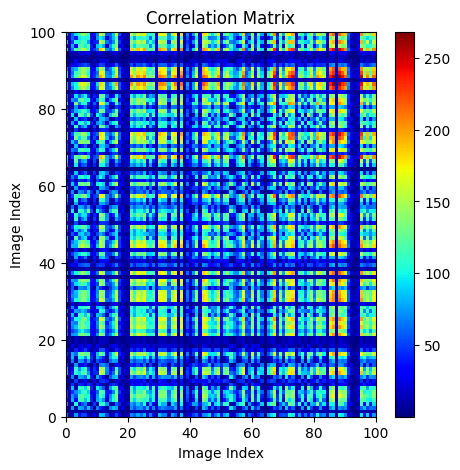

In [3]:
# Compute the correlation matrix
X100 = X[:, :100]
C = np.dot(X100.T, X100)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(5, 5))
pcolor = ax.pcolor(C, cmap='jet')
fig.colorbar(pcolor)
ax.set_title('Correlation Matrix')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image Index')
plt.show()

Part B)
From the correlation matrix for part (a), which two images are most highly correlated? Which are
most uncorrelated? Plot these faces.


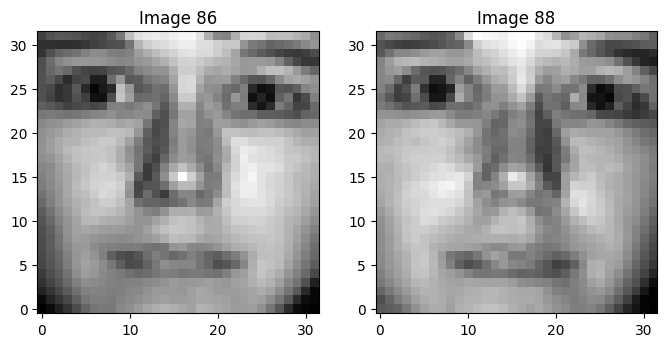

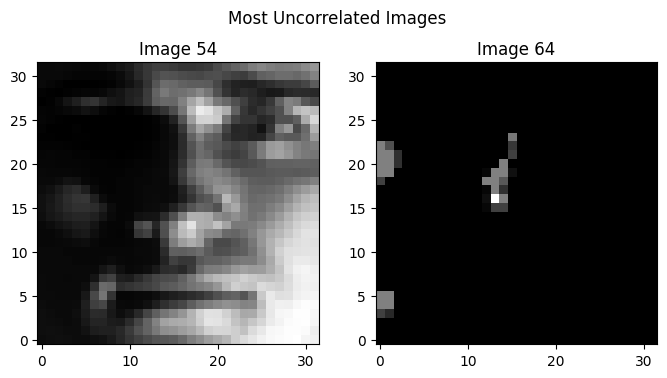

In [17]:
data = scipy.io.loadmat('yalefaces.mat')
X = data['X']

# Compute the correlation matrix
X100 = X[:, :100]
C = np.dot(X100.T, X100)
# Find the indices of the two most highly correlated images
max_corr_idx = np.unravel_index(np.argmax(C - np.eye(C.shape[0]) * C.max()), C.shape)
img1_idx = max_corr_idx[0]
img2_idx = max_corr_idx[1]

# Find the indices of the two most uncorrelated images
min_corr_idx = np.unravel_index(np.argmin(C + np.eye(C.shape[0]) * C.max()), C.shape)
img3_idx = min_corr_idx[0]
img4_idx = min_corr_idx[1]

# Plot the two most highly correlated images with switched x and y axes and rotated by 180 degrees
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.rot90(X[:, img1_idx].reshape(32, 32), 2), cmap='gray', origin='lower')
axs[0].set_title(f'Image {img1_idx}')
axs[1].imshow(np.rot90(X[:, img2_idx].reshape(32, 32), 2), cmap='gray', origin='lower')
axs[1].set_title(f'Image {img2_idx}')

# Plot the two most uncorrelated images with switched x and y axes and rotated by 180 degrees
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.rot90(X[:, img3_idx].reshape(32, 32), 2), cmap='gray', origin='lower')
axs[0].set_title(f'Image {img3_idx}')
axs[1].imshow(np.rot90(X[:, img4_idx].reshape(32, 32), 2), cmap='gray', origin='lower')
axs[1].set_title(f'Image {img4_idx}')
plt.suptitle('Most Uncorrelated Images')

plt.show()


Part C)
Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the
correlation matrix between them.
[1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].
(Just for clarification, the first image is labeled as one, not zero like python might do)

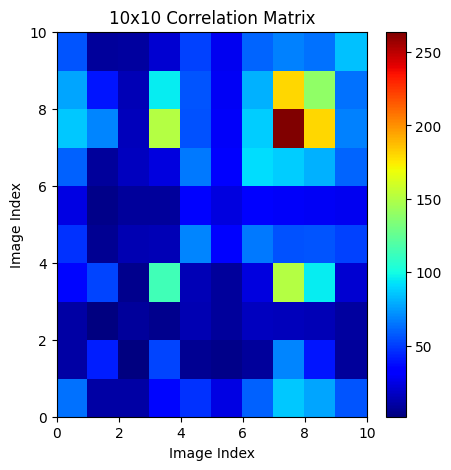

In [5]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

results = loadmat('yalefaces.mat')
X = results['X']

# Select the specified images
image_indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]  # Note that the indices are 0-based
X10 = X[:, image_indices]

# Compute the correlation matrix
C = np.dot(X10.T, X10)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(5, 5))
pcolor = ax.pcolor(C, cmap='jet')
fig.colorbar(pcolor)
ax.set_title('10x10 Correlation Matrix')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image Index')
plt.show()


Part D)
Create the matrix Y = XXT and find the first six eigenvectors with the largest magnitude eigenvalue.

In [6]:
# Create the matrix Y = X * X^T
Y = np.dot(X, X.T)
# Find the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)
# Sort the eigenvectors based on the magnitude of the eigenvalues
sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Take the first six eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :6]
largest_normalized = top_eigenvectors / np.linalg.norm(top_eigenvectors, axis=0)

# Print the first six eigenvalues and eigenvectors

print("First six eigenvectors:\n", top_eigenvectors[:6])


First six eigenvectors:
 [[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 [ 0.0289902   0.04316163  0.02344727  0.05744188  0.00932899  0.05424285]
 [ 0.03057294  0.04080838  0.00992662  0.05720359  0.02096932  0.06259919]
 [ 0.03229324  0.03805116 -0.00241627  0.05372178  0.02766062  0.0694475 ]]


Part E)  SVD the matrix X and find the first six principal component directions.


In [7]:
# Perform Singular Value Decomposition (SVD) on matrix X
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Take the first six principal component directions
principal_components = U[:, :6]

# Print the first six principal component directions
print("First six principal component directions:\n", principal_components[:6])


First six principal component directions:
 [[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 [-0.0289902  -0.04316163 -0.02344727  0.05744188  0.00932899  0.05424285]
 [-0.03057294 -0.04080838 -0.00992662  0.05720359  0.02096932  0.06259919]
 [-0.03229324 -0.03805116  0.00241627  0.05372178  0.02766062  0.0694475 ]]


Part F) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the
norm of difference of their absolute values.

In [8]:
# Extract the first eigenvector v1 from sorted_eigenvectors
v1 = top_eigenvectors[:, 0]

# Extract the first SVD mode u1 from principal_components
u1 = principal_components[:, 0]

# Compute the norm of the difference of their absolute values
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))

# Print the norm of the difference
print("Norm of difference of absolute values: ", norm_diff)


Norm of difference of absolute values:  6.415522462814552e-16


Part G) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6
SVD modes

Percentage of variance captured by each SVD mode:
SVD mode 1: 77.68%
SVD mode 2: 16.28%
SVD mode 3: 2.73%
SVD mode 4: 2.00%
SVD mode 5: 0.68%
SVD mode 6: 0.63%


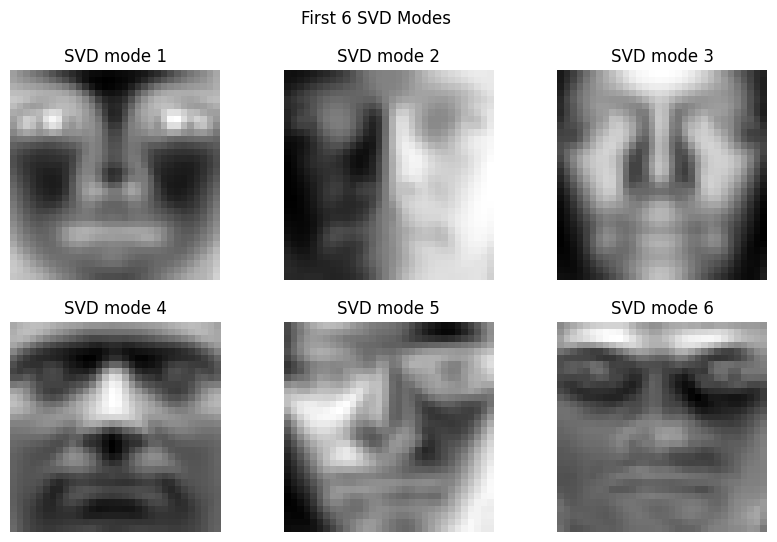

In [10]:
# Compute the percentage of variance captured by each SVD mode
U, S, VT = np.linalg.svd(X)

# Extract the singular values
singular_values = S[:6]
total_variance = np.sum(singular_values**2)
variance_captured = (singular_values**2 / total_variance) * 100

# Print the percentage of variance captured by each SVD mode
print("Percentage of variance captured by each SVD mode:")
for i in range(6):
    print("SVD mode {}: {:.2f}%".format(i+1, variance_captured[i]))

# Plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(principal_components[:, i].reshape(32,32), cmap='gray')
    axs[row, col].set_title("SVD mode {}".format(i+1))
    axs[row, col].axis('off')
plt.suptitle("First 6 SVD Modes")
plt.show()
